## Heart Disease Problem

Objective:

* Understand the Dataset & cleanup (if required).
* Build classification models to predict whether or not the patients have Heart Disease.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Step:1 Problem

Find The Heart Disease Of Patient Wether a Patient Has Heart Disease or Not From The Given Dataset.
<br> `Classification problem`

## Step:2 Data

* Data Downloaded From The Kaggle.com
https://www.kaggle.com/datasets/yasserh/heart-disease-dataset/discussion/313597?select=heart.csv

* Data is Label Data
    * Feature Veriables 13 [12 data type integer 1 data type float]
    * target Veriable 1 [data type Integer]

## Step:3 Evaluation
if the accuracy is 95% weather a patient has heart disease or not, then this project will be pursue

## Step:4 Features
feature=age - age in years
sex - 1 = male; 0 = female
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophgael spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left venticular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Unsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downsloping: Signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3 = normal
6 = fixed defect: Used to be defect but ok now
7 = reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no)(= the predicted attribute

In [1]:
Features={
    "age":"age in years", 
    "sex":"1 = male; 0 = female",
    "cp":"chest pain type 0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical angina: chest pain not related to heart 2: Non-anginal pain: typically esophgael spasms (non heart related) 3: Asymptomatic: chest pain not showing signs of disease",
    "trestbps":"resting blood pressure (in mm Hg on admission to the hospital)",
    "chol": "serum cholestoral in mg/dl  serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern",
    "fbs(fasting blood sugar > 120 mg/dl)":"(1 = true; 0 = false) '>126' mg/dL signals diabetes",
    "restecg" : "resting electrocardiographic results  0: Nothing to note  1: ST-T Wave abnormality can range from mild symptoms to severe problem ssignals non-normal heart beat, 2: Possible or definite left venticular hypertrophy Enlarged heart's main pumping chamber",
    "thalach" : "maximum heart rate achieved",
    "exang": "exercise induced angina (1 = yes; 0 = no)",
    "oldpeak":"ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more",
    "slope":"the slope of the peak exercise ST segment 0: Unsloping: better heart rate with excercise (uncommon) 1: Flatsloping: minimal change (typical healthy heart) 2: Downsloping: Signs of unhealthy heart",
    "ca":"number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)",
    "thal":"thalium stress result 1,3 = normal 6 = fixed defect: Used to be defect but ok now 7 = reversable defect: no proper blood movement when excercising",
    "target":"have disease or not (1=yes, 0=no)(= the predicted attribute"
}

In [2]:
Features

{'age': 'age in years',
 'sex': '1 = male; 0 = female',
 'cp': 'chest pain type 0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical angina: chest pain not related to heart 2: Non-anginal pain: typically esophgael spasms (non heart related) 3: Asymptomatic: chest pain not showing signs of disease',
 'trestbps': 'resting blood pressure (in mm Hg on admission to the hospital)',
 'chol': 'serum cholestoral in mg/dl  serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern',
 'fbs(fasting blood sugar > 120 mg/dl)': "(1 = true; 0 = false) '>126' mg/dL signals diabetes",
 'restecg': "resting electrocardiographic results  0: Nothing to note  1: ST-T Wave abnormality can range from mild symptoms to severe problem ssignals non-normal heart beat, 2: Possible or definite left venticular hypertrophy Enlarged heart's main pumping chamber",
 'thalach': 'maximum heart rate achieved',
 'exang': 'exercise induced angina (1 = yes; 0 = no)',
 'oldpeak': 'ST de

## setup The important basic tools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load The Data

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
## Data Exploratory Analysis.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


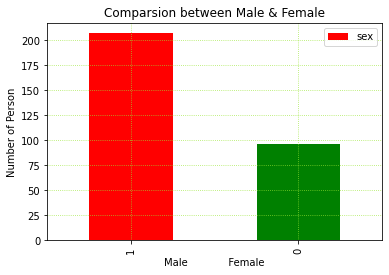

In [10]:
df['sex'].value_counts().plot(kind="bar", color=["red","green"])
plt.title("Comparsion between Male & Female")
plt.xlabel("Male             Female")
plt.ylabel("Number of Person")
plt.legend()
plt.grid(color=(0.6,0.9,0.2),alpha=0.9,linestyle='dotted')


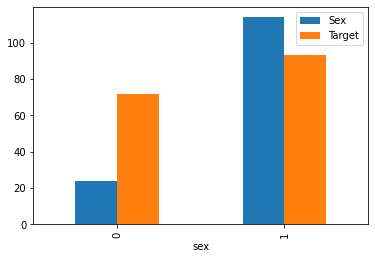

In [11]:
pd.crosstab(df['sex'],df['target']).plot.bar()
plt.legend(["Sex","Target"])

In [12]:
print(df.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [13]:
import seaborn as sb

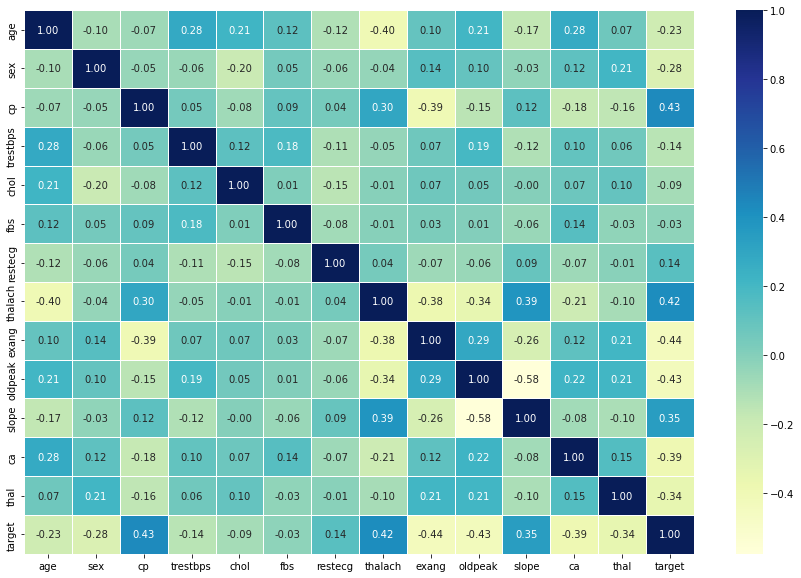

In [14]:
correlation=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sb.heatmap(correlation,annot=True,cmap="YlGnBu",linewidth=0.5,fmt=".2f")

## Apply machine learning algorithm  

In [15]:
# it is use to split data into train and test set.
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
Y=df.target
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
df.shape, x_train.shape,x_test.shape,y_train.shape,y_test.shape

((303, 14), (242, 13), (61, 13), (242,), (61,))

## machine learning models

In [20]:
from sklearn import svm

In [21]:
regr = svm.SVC()
regr.fit(x_train,y_train)

SVC()

In [22]:
value=regr.score(x_test,y_test)
print(f"This is Score in Percentage of SVM: {round(value*100,2)}%")

This is Score in Percentage of SVM: 63.93%


## the above algorithm does not full fill our desire or evaluation matrix that we set to 90%

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
neighbor=KNeighborsClassifier()
neighbor.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
value=neighbor.score(x_test,y_test)
print(f"Thi is Score in Percentage of Neighbors : {round(value*100,2)}%")

Thi is Score in Percentage of Neighbors : 59.02%


## The Above neighbors algorithm still does not full fill our desire or evaluation matrix that we set to 90%

## it is very tidious work to evaluate each algroithm again in again with same number of steps

## make a valuation function for it.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
algorithm={
    "LogisticRegression":LogisticRegression(),
    "SVC":svm.SVC(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier(),

}

def evaluation_fun(X_train,X_test,Y_train,Y_test,algorithm):
    #np.random.seed(43)
    score_dict={}
    for name,function in algorithm.items():
        algo=function
        algo.fit(X_train,Y_train)
        score_dict[name]=round(algo.score(X_test,Y_test)*100,2)
    return score_dict


In [29]:
result=evaluation_fun(x_train,x_test,y_train,y_test,algorithm)

C:\first_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

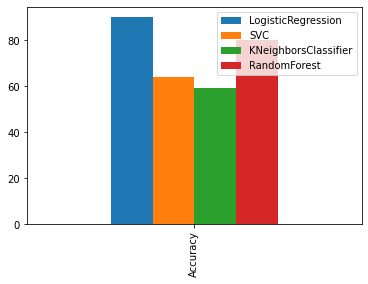

In [30]:
result_for_graph=pd.DataFrame(result,index=["Accuracy"])
result_for_graph.plot(kind="bar")

In [31]:
result

{'LogisticRegression': 90.16,
 'SVC': 63.93,
 'KNeighborsClassifier': 59.02,
 'RandomForest': 80.33}

## Here RandomForest is best among the 4 algorithm so i am taking Randomforst and let's Tune the RandomForest.

In [32]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
score_in_percentage=round(lr.score(x_test,y_test)*100,2)
print(f" I have achived Score from the LogisticRegression is :{score_in_percentage}%")

 I have achived Score from the LogisticRegression is :90.16%


C:\first_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [34]:
param_grid = {
     'penalty' :['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    }
    

In [35]:
cv = RandomizedSearchCV(lr,param_grid,cv=50)
cv.fit(x_train,y_train.values.ravel())

RandomizedSearchCV(cv=50, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']})

In [36]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [37]:
display(cv)

Best parameters are: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}


0.74 + or -0.19 for the {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.012742749857031334}
0.807 + or -0.179 for the {'solver': 'liblinear', 'penalty': 'l1', 'C': 29.763514416313132}
0.823 + or -0.163 for the {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}
0.811 + or -0.172 for the {'solver': 'liblinear', 'penalty': 'l2', 'C': 78.47599703514607}
0.544 + or -0.08 for the {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.0006951927961775605}
0.815 + or -0.169 for the {'solver': 'liblinear', 'penalty': 'l2', 'C': 11.288378916846883}
0.807 + or -0.179 for the {'solver': 'liblinear', 'penalty': 'l1', 'C': 545.5594781168514}
0.807 + or -0.169 for the {'solver': 'liblinear', 'penalty': 'l2', 'C': 29.763514416313132}
0.823 + or -0.163 for the {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.615848211066026}
0.456 + or -0.08 for the {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.0002636650898

In [38]:
cv.fit(x_train,y_train)

RandomizedSearchCV(cv=50, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']})

In [39]:
print(f"Before The Tune We Get This Result :{score_in_percentage}%")
print(f"After the Tune We Get This Result  : {round(cv.score(x_test,y_test)*100,2)}%")

Before The Tune We Get This Result :90.16%
After the Tune We Get This Result  : 85.25%


In [40]:
cv.predict(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [41]:
y_test.count()

61

In [42]:
pd.crosstab(cv.predict(x_test),y_test)

target,0,1
row_0,,
0,21,2
1,7,31


<AxesSubplot:xlabel='row_0'>

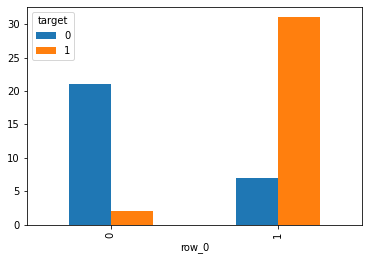

In [49]:
pd.crosstab(cv.predict(x_test),y_test).plot(kind="bar")

In [44]:
lr.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [46]:
pd.crosstab(lr.predict(x_test),y_test)

target,0,1
row_0,,
0,23,1
1,5,32


<AxesSubplot:xlabel='row_0'>

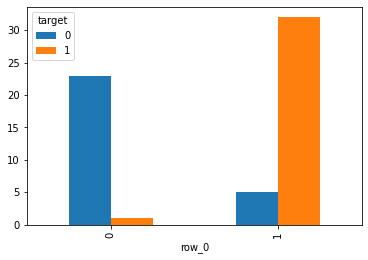

In [51]:
pd.crosstab(lr.predict(x_test),y_test).plot(kind="bar")

## Evaluation of Model

* ROC & AUC (Receiver Operating characteristic) & (Area Under Curve)
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1

In [52]:
## ROC & AUC.
from sklearn.metrics import plot_roc_curve

C:\first_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


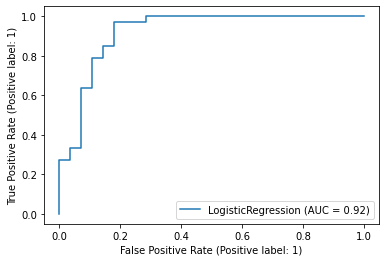

In [54]:
plot_roc_curve(lr,x_test,y_test);

### hhhhhhhh we got AUC=0.92 Which is near to 1 , it means that model perform well.

In [66]:
# confusion metrics
from sklearn.metrics import plot_confusion_matrix

C:\first_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


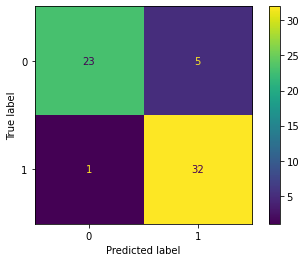

In [82]:
pred=lr.predict(x_test)
plot_confusion_matrix(lr,x_test,y_test)

In [69]:
# classification report
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

